In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-02 00:00:00+00:00,60836.324219,62357.687500,59996.949219,60632.785156,40762722398,0.0,0.0
2024-10-03 00:00:00+00:00,60632.484375,61469.039062,59878.804688,60759.402344,36106447279,0.0,0.0
2024-10-04 00:00:00+00:00,60754.625000,62465.992188,60459.941406,62067.476562,29585472513,0.0,0.0


In [5]:
btc.index = pd.to_datetime(btc.index)

In [6]:
del btc["Dividends"]
del btc["Stock Splits"]

In [7]:
btc.columns = [c.lower() for c in btc.columns]

<AxesSubplot:xlabel='Date'>

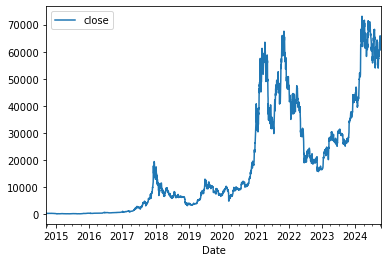

In [8]:
btc.plot.line(y="close", use_index=True)

In [9]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [10]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-10-02,0.200000,-0.132782,0.133333
2024-10-03,0.200000,-0.132782,0.133333
2024-10-04,0.233333,-0.165946,0.166667
2024-10-05,0.400000,-0.158031,0.180000


In [11]:
btc.index = pd.to_datetime(btc.index)
btc.index = btc.index.tz_localize(None) 

In [12]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [13]:
btc["tomorrow"] = btc["close"].shift(-1)

In [14]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [15]:
btc["target"].value_counts()

1    1942
0    1731
Name: target, dtype: int64

In [16]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2024-10-02,60836.324219,62357.687500,59996.949219,60632.785156,40762722398,0.200000,-0.132782,0.133333,60759.402344,1
2024-10-03,60632.484375,61469.039062,59878.804688,60759.402344,36106447279,0.200000,-0.132782,0.133333,62067.476562,1
2024-10-04,60754.625000,62465.992188,60459.941406,62067.476562,29585472513,0.233333,-0.165946,0.166667,62089.949219,1
2024-10-05,62067.609375,62371.023438,61689.582031,62089.949219,13305410749,0.400000,-0.158031,0.180000,62586.468750,1


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.576271186440678

In [20]:
preds

2024-03-21    0
2024-03-22    0
2024-03-23    0
2024-03-24    0
2024-03-25    0
             ..
2024-10-02    1
2024-10-03    1
2024-10-04    1
2024-10-05    1
2024-10-06    1
Length: 200, dtype: int32

In [ ]:
# To increase more accuracy try other methods

In [21]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [22]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [23]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [24]:
predictions["predictions"].value_counts()

1    1474
0    1104
Name: predictions, dtype: int64

In [25]:
precision_score(predictions["target"], predictions["predictions"])

0.5040705563093623

In [ ]:
# This is another method to increase accuracy

In [26]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [27]:
btc, new_predictors = compute_rolling(btc.copy())

In [28]:
predictions = backtest(btc, model, new_predictors)


In [29]:
precision_score(predictions["target"], predictions["predictions"])

0.5257563368765331

In [30]:
predictions

,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-10-02,1,1
2024-10-03,1,1
2024-10-04,1,0
2024-10-05,1,1
